# Задание

Разработайте собственную реализацию байесовского классификатора и сравните её с классификаторами из SciKit-Learn: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes. При обучении классификаторов использовать набор данных, полученный при выполнении лабораторной работы 1.

Замерьте прозводительность классификаторов - время, затраченное на классификацию одного экземпляра данных (одна точка) - и сравните производительность разработанного вами классификатора с классификаторами SciKit-Learn.
Замерьте точность классификаторов и сравните точность разработанного вами классификатора с классификаторами SciKit-Learn.

По завершению выполнения работы необходимо (первые 4 пункта обязательны для выполнения):
1. построить матрицы ошибок для каждого классификатора;
2. определить классификатор, имеющий наибольшую точность;
3. построить гистограммы производительности для всех классификаторов, разместив их на одном графике;
4. определить классификатор с наиболее стабильной производительностью. В качестве критерия стабильности использовать дисперсию времени, затраченного на классификацию одного экземпляра данных (одна точка);
5. *задание на дополнительные баллы:* найти более достоверный критерий оценки стабильности производительности и использовать его по аналогии с пунктом 4. Обосновать, почему он является более достоверным.

Соответствующие пункты задания (1-4 и 5, если выполнен) должны быть выведены в результате работы программы.

Документация байесовских классификаторов SciKit-Learn: https://scikit-learn.org/stable/modules/naive_bayes.html

Используете варианты (наборы данных) из первой лабораторной работы.

Вариант 25. N = 5, M = 968, (R1,R2) = (0,676;0,686).

# План действий.

1. Разработать собственную реализацию байесовского классификатора и сравнить её с классификаторами из SciKit-Learn: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes. При обучении классификаторов использовать набор данных, полученный при выполнении лабораторной работы 1.
2. Замерить прозводительность классификаторов - время, затраченное на классификацию одного экземпляра данных (одна точка) - и сравнить производительность разработанного классификатора с классификаторами SciKit-Learn.
3. Замерить точность классификаторов и сравнить точность разработанного вами классификатора с классификаторами SciKit-Learn.

Привести следующие выводы в конце:

4. построить матрицы ошибок для каждого классификатора;
5. определить классификатор, имеющий наибольшую точность;
6. построить гистограммы производительности для всех классификаторов, разместив их на одном графике;
7. определить классификатор с наиболее стабильной производительностью. В качестве критерия стабильности использовать дисперсию времени, затраченного на классификацию одного экземпляра данных (одна точка);
8. *задание на дополнительные баллы:* найти более достоверный критерий оценки стабильности производительности и использовать его по аналогии с пунктом 4. Обосновать, почему он является более достоверным.

# 0. Проинициализируем начальные данные

Библиотеки:

In [78]:
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn
#!pip install seaborn

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

Входные данные:

In [80]:
N = 5                # кол-во классов
M = 968              # кол-во точек в каждом классе
R1 = 0,676           # интервал точности
R2 = 0,686

CLASSES_DISTANCE = 1.2 # расстояние между классами, которое использовать при генерации
TEST_DATA_SIZE = 0.25 # размер тестовой выборки, 0 <= TEST_DATA_SIZE <= 1
START_SHIFT = 5

Генерация набора данных, как в 1 лабе:

In [81]:
# генерация данных:
# rng = np.random.default_rng()

def _generate_classes(classes_count, points_per_class_count, bias):
    classes = []
    for i in range(classes_count):
        noise = np.random.randn(points_per_class_count, 2) # M точек, 2 координаты
        x_shift = START_SHIFT + bias * i
        y_shift = START_SHIFT + bias * i
        shifted_noise = noise +  np.array([x_shift, y_shift])
    
        classes.append(shifted_noise)
        
    # объединение всех массивов с классами в один
    all_classes = np.vstack(classes)
        
    return all_classes

def _generate_annotations(classes_count, points_per_class_count):
    annotations = []
    for i in range(classes_count):
        current_class_annotations = [i] * points_per_class_count
        annotations.extend(current_class_annotations)
    
    return annotations

def generate_data(classes_count, points_per_class_count, bias):
    classes = _generate_classes(classes_count, points_per_class_count, bias)
    annotations = _generate_annotations(classes_count, points_per_class_count)
        
    return classes, annotations


# построение графика:
def plot_data(classes):
    for class_i in classes:
        plt.scatter(class_i[:, 0], class_i[:, 1])
    plt.plot()

Генерируем и строим график:

In [82]:
all_classes, annotations = generate_data(N, M, CLASSES_DISTANCE)

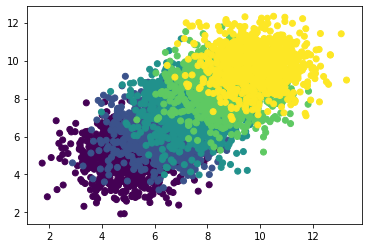

In [83]:
# построить график
plt.scatter(all_classes[:,0], all_classes[:,1], c=annotations)

In [84]:
# перемешаем данные
shuffled_all_classes, labels = shuffle(all_classes, annotations, random_state=1)

In [85]:
# разделим данные на обучающие и тестовые выборки
test_size = int(len(shuffled_all_classes) * TEST_DATA_SIZE)
Xtest = shuffled_all_classes[:test_size]
Ytest = labels[:test_size]
Xtrain = shuffled_all_classes[test_size:]
Ytrain = np.array(labels[test_size:])
print(test_size)
print(len(Ytest))
print(Xtrain)

XYtrain = [np.append(item, Ytrain[i]) for i, item in enumerate(Xtrain)]
XYtest = [np.append(item, Ytest[i]) for i, item in enumerate(Xtest)]

XYtrain_df = pd.DataFrame(XYtrain, columns=['x', 'y', 'class'])
#print(Xtrain_with_labels)

1210
1210
[[7.39758323 5.21729121]
 [5.9630521  5.62133332]
 [6.43771554 8.36125908]
 ...
 [4.5192897  4.30320855]
 [9.41537492 8.84256784]
 [5.25126931 3.14267905]]


In [86]:
XYtrain_df

x         y  class
0     7.397583  5.217291    1.0
1     5.963052  5.621333    1.0
2     6.437716  8.361259    3.0
3     5.950279  5.989168    1.0
4     8.804806  7.268280    3.0
...        ...       ...    ...
3625  6.475706  7.508315    2.0
3626  5.136445  6.431278    2.0
3627  4.519290  4.303209    0.0
3628  9.415375  8.842568    4.0
3629  5.251269  3.142679    0.0

[3630 rows x 3 columns]

In [87]:
# создадим и обучим классификатор
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)

/home/izogrow/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Проверить классификатор на 2 половине выборки, отобразить точность.

In [88]:
predictions = clf.predict(Xtest)
accuracy_score(Ytest, predictions)

0.6809917355371901

Матрица ошибок

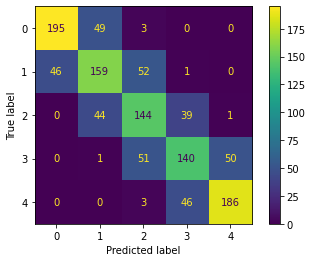

In [89]:
cm = confusion_matrix(Ytest, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# 1. Разработать собственную реализацию байесовского классификатора и сравнить её с классификаторами из SciKit-Learn

Создадим собственный байесовский классификатор

In [ ]:
class custom_bayesian_classifier:
    def __init__(self):
        self.classes_n = N

    def fit(self, x, y):
        data = np.array([x[y == c] for c in range(self.classes_n)])
        self.classes_probs = np.array([i.shape[0] for i in data]) / len(x)
        self.means = np.array([self.get_means(data[i]) for i in range(self.classes_n)])
        self.stds = np.array([self.get_standard_deviation(i) for i in data])

    def predict(self, x):
        probs = np.apply_along_axis(self.get_probabilities, 1, x, mean=self.means, std=self.stds)
        probs = np.multiply(np.prod(probs, axis=2), self.classes_probs)
        return np.argmax(probs, axis=1)

    @staticmethod
    def get_means(x):
        return np.mean(x, axis=0)

    @staticmethod
    def get_standard_deviation(x):
        return np.std(x, axis=0)

    @staticmethod
    def get_probabilities(x, mean, std):
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-(np.square(x - mean) / (2 * np.square(std))))

Запустим классификаторы

Model: custom


/tmp/ipykernel_5016/1814824521.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array([x[y == c] for c in range(self.classes_n)])


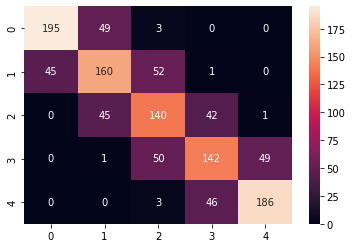

/tmp/ipykernel_5016/1814824521.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array([x[y == c] for c in range(self.classes_n)])


Model: GaussianNB


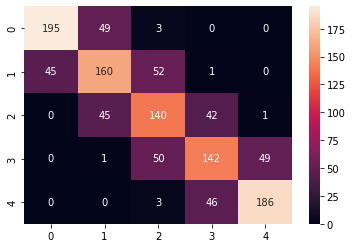

Model: MultinomialNB


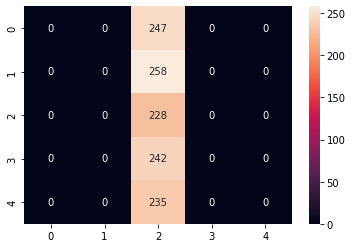

Model: ComplementNB


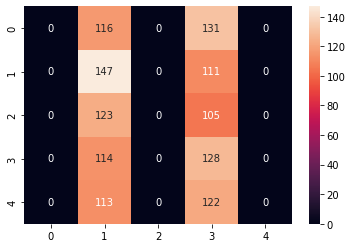

Model: BernoulliNB


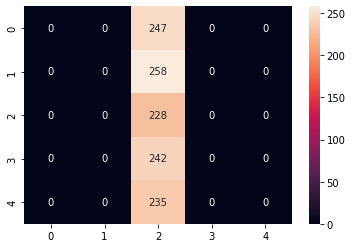

In [91]:
from time import time

models = {'custom': custom_bayesian_classifier,
          'GaussianNB': GaussianNB,
          'MultinomialNB': MultinomialNB,
          'ComplementNB': ComplementNB,
          'BernoulliNB': BernoulliNB
          }
results = {'custom': [],
           'GaussianNB': [],
           'MultinomialNB': [],
           'ComplementNB': [],
           'BernoulliNB': []
           }
times ={
            'custom': [],
           'GaussianNB': [],
           'MultinomialNB': [],
           'ComplementNB': [],
           'BernoulliNB': []
            }
trials = 10;
for k, v in models.items():
    for i in range(trials):
        model = v()
        start = time()
        model.fit(Xtrain, Ytrain)
        pred = model.predict(Xtest)
        current_time = time() - start
        times[k].append(current_time)
        acc = np.mean(pred == Ytest)
        results[k].append(acc)
        if i == 0:
            print(f"Model: {k}")
            sns.heatmap(confusion_matrix(Ytest, pred), annot=True, fmt='d')
            plt.show() 


Создадим и обучим классификаторы из SciKit-Learn: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes:

Model: custom
Average Time: 0.014261674880981446 

Model: GaussianNB
Average Time: 0.001930403709411621 

Model: MultinomialNB
Average Time: 0.00109100341796875 

Model: ComplementNB
Average Time: 0.0009981393814086914 

Model: BernoulliNB
Average Time: 0.0013023138046264649 

Model with best performance: ComplementNB



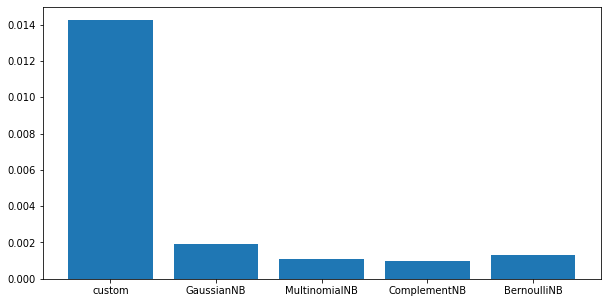

In [92]:
labels = times.keys()
for k, v in times.items():
    print(f"Model: {k}")
    print(f"Average Time: {np.mean(v)} \n")
plt.figure(figsize=(10,5))
plt.bar(labels,np.mean([i for i in times.values()],axis=1))
print(f"Model with best performance: {list(times)[np.argmin(np.mean([i for i in times.values()],axis=1))]}\n")

In [93]:
for k,v in results.items():
    print(f"Model: {k}")
    print(f"Average accuracy: {np.mean(v)} \n")
means = np.mean([i for i in results.values()],axis=1)
m = max(means)
maxes = [i for i, j in enumerate(means) if j==m]    
print(f"Model with best results: {[[*results][i] for i in maxes]}\n")

Model: custom
Average accuracy: 0.6801652892561983 

Model: GaussianNB
Average accuracy: 0.6801652892561983 

Model: MultinomialNB
Average accuracy: 0.18842975206611573 

Model: ComplementNB
Average accuracy: 0.22727272727272724 

Model: BernoulliNB
Average accuracy: 0.18842975206611573 

Model with best results: ['custom', 'GaussianNB']



Вывод: байесовские классификаторы из numpy работают в ~5-10 раз быстрее, чем мой самописный классификатор. Точность на данном датасете больше у гауссовского классификатора и моего.